In [3]:
from Arbie import Token
from Arbie.Actions.path_finder import TradingGraph
from Arbie.Variables.pool import Pool
import networkx as nx

eth = Token('eth')  # 300
dai = Token('dai')  # 1
btc = Token('btc')  # 10000
yam = Token('yam')  # 0.1

small = 10
medium = 100
large = 1000

pools = [
        Pool(
            [eth, dai, yam],
            [small / 303.0, small / 0.9, small / 0.1],
            [1 / 3.0, 1 / 3.0, 1 / 3.0], 0.004),
        Pool(
            [eth, btc],
            [large / 305.0, large / 10000],
            [5 / 6, 1 / 6], 0.01),
        Pool(
            [eth, dai, btc],
            [medium / 301.0, medium / 1.1, medium / 10020],
            [1 / 2.0, 1 / 4.0, 1 / 4.0], 0.004),
        Pool(
            [dai, yam],
            [small / 1.1, small / 0.1],
            [1 / 2.0, 1 / 2.0], 0.001),
    ]


graph = TradingGraph(pools)
graph.graph

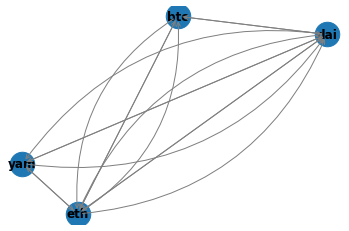

In [4]:
import matplotlib.pyplot as plt
pos = nx.random_layout(graph.graph)
nx.draw_networkx_nodes(graph.graph, pos, node_size = 600, alpha = 1)
labels = nx.draw_networkx_labels(graph.graph, pos=pos, font_weight='bold')
ax = plt.gca()
for e in graph.get_edges():
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

In [5]:
for (u, v, wt) in graph.get_edges().data('weight'):
    print(f"({u}, {v}, {wt:.6})")

(eth, dai, 0.0029703)
(eth, dai, 0.00182724)
(eth, yam, 0.000330033)
(eth, btc, 6.55738)
(eth, btc, 16.6445)
(dai, eth, 336.667)
(dai, eth, 547.273)
(dai, yam, 0.111111)
(dai, yam, 0.0909091)
(dai, btc, 9109.09)
(yam, eth, 3030.0)
(yam, dai, 9.0)
(yam, dai, 11.0)
(btc, eth, 0.1525)
(btc, eth, 0.0600798)
(btc, dai, 0.00010978)


In [7]:
from Arbie.Variables.graph import FilteredTradingGraph

f_graph = FilteredTradingGraph(graph)

for (u, v, wt) in f_graph.get_edges().data('weight'):
    print(f"({u}, {v}, {wt:.6})")

(eth, dai, 0.00182724)
(eth, yam, 0.000330033)
(eth, btc, 6.55738)
(dai, eth, 336.667)
(dai, yam, 0.0909091)
(dai, btc, 9109.09)
(yam, eth, 3030.0)
(yam, dai, 9.0)
(btc, eth, 0.0600798)
(btc, dai, 0.00010978)


In [14]:
from Arbie.Actions.path_finder import PathFinder, create_trade
from Arbie.Actions import Store

st = Store()
st.add('UoA', eth)
pf = PathFinder(st)
cycles = pf.on_next(pools)
trades = create_trade(cycles[0])
trades

In [28]:
total_ratio = 1
value = 0.00000001
for trade in trades:
    price = trade.pool.spot_price(trade.token_in, trade.token_out)
    value = trade.pool.out_given_in(trade.token_in, trade.token_out, value)
    total_ratio *= price
    print(price)
print(f"Total ratio: {1/total_ratio}")
print(f"Total value after: {value}")

6.557377049180327
0.00010978043912175649
0.0909090909090909
3030.0000000000005
Total ratio: 5.043069306930692
Total value after: 4.94780884041646E-8


In [15]:
from sympy import *
from sympy.plotting import plot
init_printing()

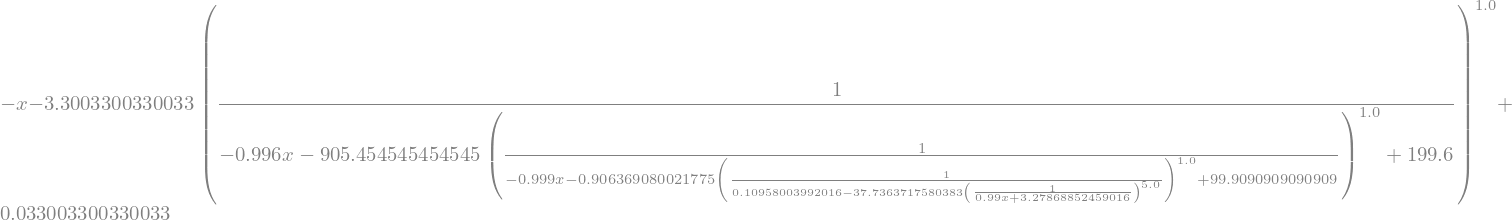

In [19]:
from Arbie.Actions.arbitrage import arbitrage_expr, arbitrage_diff_expr

x = symbols('x')
arb_expr = arbitrage_expr(trades)
arb_expr

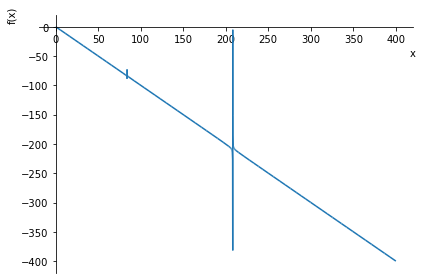

In [20]:
# If we plot we can clearly see that there seams to be some profit to be made!
plot(arb_expr, (x, 0, 400))